In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
def preprocess_data():
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Preprocess the data
    x_train = x_train.reshape(60000, 28, 28, 1)
    x_test = x_test.reshape(10000, 28, 28, 1)
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)

    # Create a validation set from the training set
    val_size = int(0.2 * len(x_train))
    val_data = x_train[:val_size]
    val_labels = y_train[:val_size]
    train_data = x_train[val_size:]
    train_labels = y_train[val_size:]

    return (train_data, train_labels, val_data, val_labels, x_test, y_test)

In [ ]:
def create_model():
    # Define the neural network architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
def train_model(model, train_data, train_labels, val_data, val_labels):
    # Train the model and save the training history
    history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels), verbose=2)

    return history

In [ ]:
def evaluate_model(model, data, labels):
    # Evaluate the model on the given data and labels
    score = model.evaluate(data, labels, verbose=0)
    print('Loss:', score[0])
    print('Accuracy:', score[1])

    # Generate predictions for the data
    predictions = model.predict(data)

    # Convert the predictions and labels to integer values
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(labels, axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion matrix:')
    print(cm)
    
    return score

In [ ]:
def plot_loss(history):
    # Plot the training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

In [ ]:
def plot_predictions(model, data, labels):
    # Make predictions on the data
    predictions = model.predict(data)

    # Plot 20 random images with their predicted labels
    fig, axs = plt.subplots(4, 5, figsize=(10, 8))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    for i in range(20):
        ax = axs[i // 5][i % 5]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        prediction = np.argmax(predictions[i])
        label = np.argmax(labels[i])
        if prediction == label:
            ax.set_title(str(prediction), color='green')

In [ ]:
# Preprocess the data
train_data, train_labels, val_data, val_labels, test_data, test_labels = preprocess_data()

In [ ]:
# Create the model
model = create_model()

In [ ]:
# Train the model and save the training history
history = train_model(model, train_data, train_labels, val_data, val_labels)

Epoch 1/10
1500/1500 - 45s - loss: 0.1491 - accuracy: 0.9551 - val_loss: 0.0701 - val_accuracy: 0.9781 - 45s/epoch - 30ms/step
Epoch 2/10
1500/1500 - 43s - loss: 0.0491 - accuracy: 0.9841 - val_loss: 0.0512 - val_accuracy: 0.9848 - 43s/epoch - 28ms/step
Epoch 3/10
1500/1500 - 42s - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0445 - val_accuracy: 0.9867 - 42s/epoch - 28ms/step
Epoch 4/10
1500/1500 - 43s - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0446 - val_accuracy: 0.9874 - 43s/epoch - 29ms/step
Epoch 5/10
1500/1500 - 43s - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0584 - val_accuracy: 0.9855 - 43s/epoch - 28ms/step
Epoch 6/10
1500/1500 - 45s - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.0415 - val_accuracy: 0.9892 - 45s/epoch - 30ms/step
Epoch 7/10
1500/1500 - 42s - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0461 - val_accuracy: 0.9887 - 42s/epoch - 28ms/step
Epoch 8/10
1500/1500 - 42s - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0500 - val_accuracy: 0.9887 - 42s/ep

In [ ]:
# Evaluate the model on the test set
test_score = evaluate_model(model, test_data, test_labels)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Loss: 0.03019004873931408
Accuracy: 0.9922000169754028
313/313 [==============================] - 2s 7ms/step
Confusion matrix:
[[ 973    1    0    0    0    1    2    1    0    2]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   0    1 1020    5    0    0    1    5    0    0]
 [   0    0    0 1004    0    4    0    1    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    0    0    4    0  885    2    0    0    0]
 [   1    2    0    0    1    5  949    0    0    0]
 [   0    2    1    0    0    0    0 1023    0    2]
 [   2    1    2    1    0    3    0    2  962    1]
 [   0    0    0    2    3    8    0    1    3  992]]
Test loss: 0.03019004873931408
Test accuracy: 0.9922000169754028


In [ ]:
# Evaluate the model on the training set
train_score = evaluate_model(model, train_data, train_labels)
print('Training loss:', train_score[0])
print('Training accuracy:', train_score[1])


Loss: 0.004800109658390284
Accuracy: 0.9980624914169312
1500/1500 [==============================] - 12s 8ms/step
Confusion matrix:
[[4699    0    2    0    0    1    9    2    0    4]
 [   0 5385    0    0    0    0    5    1    0    0]
 [   0    0 4772    2    0    0    1    7    0    0]
 [   0    0    0 4901    0    2    0    0    0    0]
 [   0    0    1    0 4640    0    1    1    0   15]
 [   0    0    0    0    0 4372    1    0    0    0]
 [   0    0    0    0    0    3 4707    0    0    0]
 [   0    1    2    1    0    1    0 4979    0    2]
 [   0    0    0    2    2    4    5    2 4707    2]
 [   0    0    1    1    3    2    0    3    1 4745]]
Training loss: 0.004800109658390284
Training accuracy: 0.9980624914169312


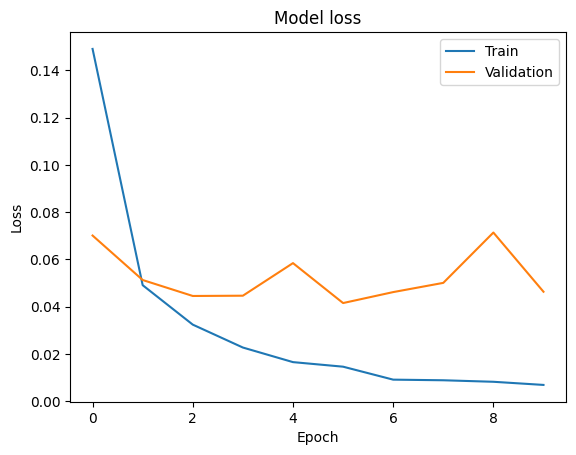

In [ ]:
# Plot the training and validation loss
plot_loss(history)

1500/1500 [==============================] - 12s 8ms/step


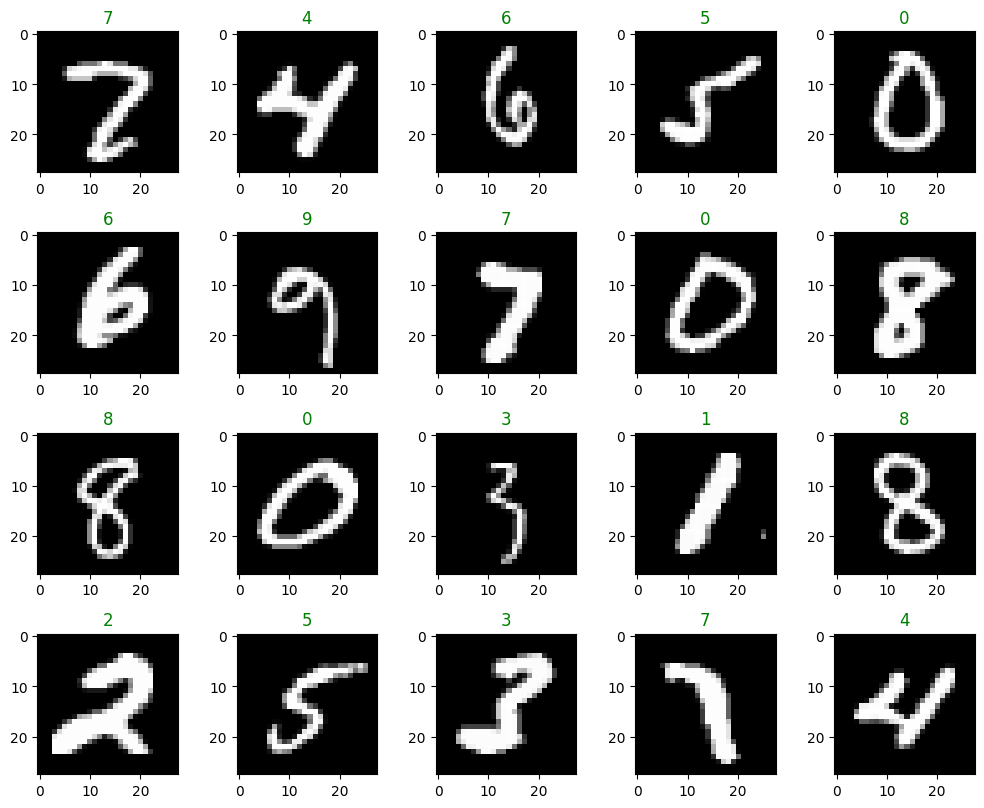

In [ ]:
# Plot the predictions on 20 random images from the training set
plot_predictions(model, train_data, train_labels)